In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Import the dataset**

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv")

# **Copy original dataset in a new dataset for EDA & other processes**

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df1.shape

(5398, 12)

In [ ]:
df1.describe()

,release_year
count,5397.000000
mean,2016.083936
std,7.121457
min,1925.000000
25%,2016.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       5398 non-null   object 
 1   type          5398 non-null   object 
 2   title         5397 non-null   object 
 3   director      3515 non-null   object 
 4   cast          4903 non-null   object 
 5   country       4735 non-null   object 
 6   date_added    5397 non-null   object 
 7   release_year  5397 non-null   float64
 8   rating        5397 non-null   object 
 9   duration      5397 non-null   object 
 10  listed_in     5397 non-null   object 
 11  description   5397 non-null   object 
dtypes: float64(1), object(11)
memory usage: 506.2+ KB


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Knowing about null values**

In [ ]:
df1.isnull().sum()

,0
show_id,0
type,0
title,1
director,1883
cast,495
country,663
date_added,1
release_year,1
rating,1
duration,1


# **Filling Null Values(which can be filled manually)**

# ***Date_Added***

In [ ]:
missing_date_added = df1[df1['date_added'].isnull()]

In [ ]:
missing_date_added

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5397,s5398,TV Sh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.loc[6066, 'date_added'] = 'December 6, 2012'

In [ ]:
df1.loc[6066]

,6066
show_id,NaN
type,NaN
title,NaN
director,NaN
cast,NaN
country,NaN
date_added,"December 6, 2012"
release_year,NaN
rating,NaN
duration,NaN


In [ ]:
df1['date_added'].fillna('September 17, 2012', inplace=True)

<ipython-input-15-b58149fe18b5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['date_added'].fillna('September 17, 2012', inplace=True)


# ***Rating***

In [ ]:
missing_ratings = df1[df1['rating'].isnull()]

In [ ]:
missing_ratings

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5397,s5398,TV Sh,NaN,NaN,NaN,NaN,"September 17, 2012",NaN,NaN,NaN,NaN,NaN
6066,NaN,NaN,NaN,NaN,NaN,NaN,"December 6, 2012",NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.loc[5989, 'rating'] = 'PG-13'

In [ ]:
df1.loc[6827, 'rating'] = 'TV-14'

In [ ]:
df1.loc[7312, 'rating'] = 'TV-G'

In [ ]:
df1.loc[7537, 'rating'] = 'R'

# ***Duration***

In [ ]:
missing_durations = df1[df1['duration'].isnull()]

In [ ]:
missing_durations

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5397,s5398,TV Sh,NaN,NaN,NaN,NaN,"September 17, 2012",NaN,NaN,NaN,NaN,NaN
6066,NaN,NaN,NaN,NaN,NaN,NaN,"December 6, 2012",NaN,NaN,NaN,NaN,NaN
5989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PG-13,NaN,NaN,NaN
6827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV-14,NaN,NaN,NaN
7312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV-G,NaN,NaN,NaN
7537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,NaN,NaN


In [ ]:
df1.loc[5541, 'duration'] = '74 min'

In [ ]:
df1.loc[5794, 'duration'] = '84 min'

In [ ]:
df1.loc[5813, 'duration'] = '66 min'

In [ ]:
df1.isnull().sum()

,0
show_id,8
type,8
title,9
director,1891
cast,503
country,671
date_added,7
release_year,9
rating,5
duration,6


# So one task is completed.
# I filled all the null values which cn be filled manually by some research.
# But can't do this for director and cast and country column, beacuse there are so much null values.And for now we leave is as it is.

# **Correction of data**



In [ ]:
df1[df1['rating'].str.contains('min', na=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df1.loc[5541, 'rating'] = 'R'
df1.loc[5794, 'rating'] = 'R'
df1.loc[5813, 'rating'] = 'R'

# **Changing Astype for better analysis**

In [ ]:
df1['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [ ]:
df1['director'] = df1['director'].astype('category')
df1['rating'] = df1['rating'].astype('category')
df1['country'] = df1['country'].astype('category')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5406 entries, 0 to 5813
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5398 non-null   object        
 1   type          5398 non-null   object        
 2   title         5397 non-null   object        
 3   director      3515 non-null   category      
 4   cast          4903 non-null   object        
 5   country       4735 non-null   category      
 6   date_added    5397 non-null   datetime64[ns]
 7   release_year  5397 non-null   float64       
 8   rating        5404 non-null   category      
 9   duration      5400 non-null   object        
 10  listed_in     5397 non-null   object        
 11  description   5397 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(1), object(7)
memory usage: 683.8+ KB


# **Some Feature Engineering**

In [ ]:
# Extract the numeric value for movie duration (in minutes)
df1['movie_duration'] = df1['duration'].apply(
    lambda x: float(str(x).strip().split()[0]) if 'min' in str(x) else None
)

# Extract the number of seasons for TV shows
df1['season_count'] = df1['duration'].apply(
    lambda x: int(str(x).strip().split()[0]) if 'Season' in str(x) else None
)

In [ ]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0


In [ ]:
df1['isMovie'] = df['duration'].str.contains('min', na=False).astype('int')
df1['isShow'] = df['duration'].str.contains('Season', na=False).astype('int')

In [ ]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,season_count,isMovie,isShow
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN,1.0,0.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0,0.0,1.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0,0.0,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0,0.0,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0,0.0,1.0


In [ ]:
df1['listed_in'].value_counts()

,count
listed_in,
Stand-Up Comedy,239
"Dramas, International Movies",215
"Comedies, Dramas, International Movies",201
"Dramas, Independent Movies, International Movies",144
Documentaries,142
...,...
"Classic & Cult TV, TV Dramas, TV Sci-Fi & Fantasy",1
"Reality TV, TV Action & Adventure, TV Mysteries",1
"Dramas, Romantic Movies, Sci-Fi & Fantasy",1


In [ ]:
df1['genres_list'] = df['listed_in'].str.strip().str.split(',')

In [ ]:
df1.explode("genres_list")['genres_list'].value_counts()

,count
genres_list,
International Movies,1666
Dramas,906
Comedies,756
International TV Shows,554
TV Dramas,529
...,...
Classic & Cult TV,4
Spanish-Language TV Shows,2
Romantic Movies,1


In [ ]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,season_count,isMovie,isShow,genres_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN,1.0,0.0,[Documentaries]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0,0.0,1.0,"[International TV Shows, TV Dramas, TV Myste..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0,0.0,1.0,"[Crime TV Shows, International TV Shows, TV ..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0,0.0,1.0,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0,0.0,1.0,"[International TV Shows, Romantic TV Shows, ..."


In [ ]:
df1['cast_list'] = df1['cast'].dropna().str.strip().str.split(',')

In [ ]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,season_count,isMovie,isShow,genres_list,cast_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN,1.0,0.0,[Documentaries],NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0,0.0,1.0,"[International TV Shows, TV Dramas, TV Myste...","[Ama Qamata, Khosi Ngema, Gail Mabalane, Th..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0,0.0,1.0,"[Crime TV Shows, International TV Shows, TV ...","[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0,0.0,1.0,"[Docuseries, Reality TV]",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0,0.0,1.0,"[International TV Shows, Romantic TV Shows, ...","[Mayur More, Jitendra Kumar, Ranjan Raj, Al..."


In [ ]:
df1.explode(['cast_list'])['cast_list'].value_counts()

,count
cast_list,
Takahiro Sakurai,25
Rajesh Kava,25
Anupam Kher,24
Julie Tejwani,22
Rupa Bhimani,22
...,...
Amber Barretto,1
Devin Ratray,1
William Murray Weiss,1


In [ ]:
df1['director'].value_counts()

,count
director,
Rajiv Chilaka,17
Suhas Kadav,15
"Raúl Campos, Jan Suter",14
Marcus Raboy,13
Cathy Garcia-Molina,12
...,...
J.C. Chandor,1
J.J. Abrams,1
"JJC Skillz, Funke Akindele",1


# **Because for now i don't want to make a recommendation system so i can drop description column.**

In [ ]:
df1['description']

,description
0,"As her father nears the end of his life, filmm..."
1,"After crossing paths at a party, a Cape Town t..."
2,To protect his family from a powerful drug lor...
3,"Feuds, flirtations and toilet talk go down amo..."
4,In a city of coaching centers known to train I...
...,...
7312,NaN
7537,NaN
5541,NaN
5794,NaN


In [ ]:
df1 = df1.drop(columns=['description'])

In [ ]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,movie_duration,season_count,isMovie,isShow,genres_list,cast_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,90.0,NaN,1.0,0.0,[Documentaries],NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",NaN,2.0,0.0,1.0,"[International TV Shows, TV Dramas, TV Myste...","[Ama Qamata, Khosi Ngema, Gail Mabalane, Th..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",NaN,1.0,0.0,1.0,"[Crime TV Shows, International TV Shows, TV ...","[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV",NaN,1.0,0.0,1.0,"[Docuseries, Reality TV]",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",NaN,2.0,0.0,1.0,"[International TV Shows, Romantic TV Shows, ...","[Mayur More, Jitendra Kumar, Ranjan Raj, Al..."


# **So i think we have done enough eda and fea. eng., so lets export the clean data in a new csv file and then do analysis on that.**

In [ ]:
df1.to_csv('cleaned_netflix_data.csv', index = False)

# **Now find some insights.**

In [ ]:
df2 = pd.read_csv('/content/cleaned_netflix_data.csv')

In [ ]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,movie_duration,season_count,isMovie,isShow,genres_list,cast_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,90.0,NaN,1.0,0.0,['Documentaries'],NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",NaN,2.0,0.0,1.0,"['International TV Shows', ' TV Dramas', ' TV ...","['Ama Qamata', ' Khosi Ngema', ' Gail Mabalane..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",NaN,1.0,0.0,1.0,"['Crime TV Shows', ' International TV Shows', ...","['Sami Bouajila', ' Tracy Gotoas', ' Samuel Jo..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV",NaN,1.0,0.0,1.0,"['Docuseries', ' Reality TV']",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",NaN,2.0,0.0,1.0,"['International TV Shows', ' Romantic TV Shows...","['Mayur More', ' Jitendra Kumar', ' Ranjan Raj..."


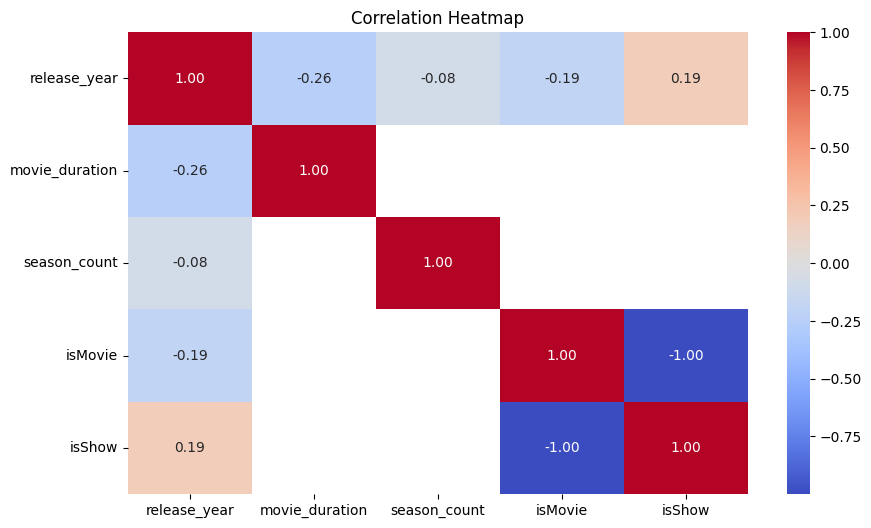

In [ ]:
# Which features in the dataset have the highest correlations with each other?

correlation_matrix = df1.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# How many movies and shows we have in our data
total = df2['type'].value_counts().head(2)
total

,count
type,
Movie,3464
TV Show,1933


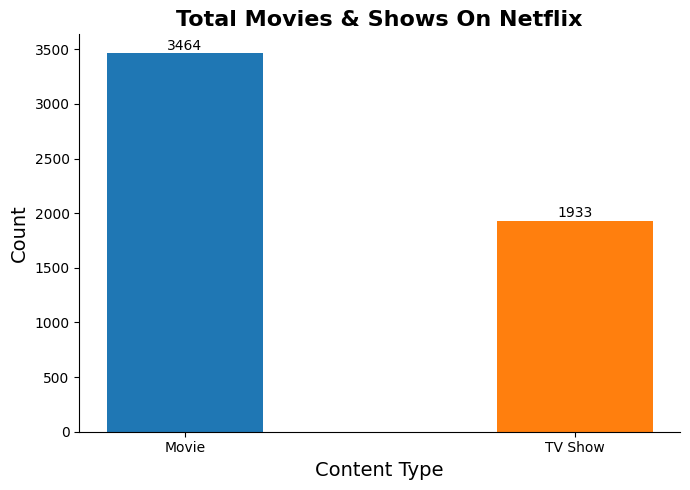

In [ ]:
plt.figure(figsize=(7, 5))
plt.bar(total.index, total.values, color=['#1f77b4', '#ff7f0e'], width=0.4)
plt.title('Total Movies & Shows On Netflix',fontsize=16, fontweight='bold')
plt.xlabel('Content Type', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
for i, value in enumerate(total.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

# Remove top and right spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()

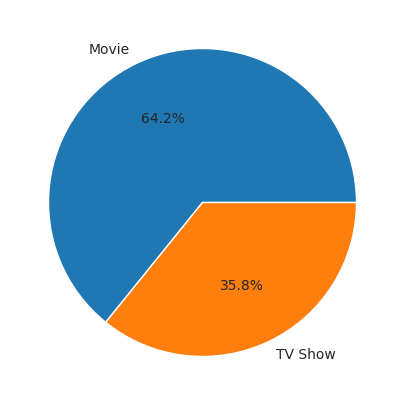

In [ ]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
plt.pie(total.values, labels = total.index, autopct='%1.1f%%')
plt.show()

# **Date & Year Analysis**

In [ ]:
df2['release_year'].value_counts()

,count
release_year,
2019.0,950
2020.0,948
2018.0,877
2021.0,591
2017.0,511
...,...
1961.0,1
1945.0,1
1964.0,1


In [ ]:
# Content Release Trend by Year

release_trend = df2.groupby(['release_year', 'type']).size().unstack()
release_trend

type,TV Show,Movie
release_year,,
1925.0,1.0,NaN
1945.0,1.0,NaN
1954.0,NaN,2.0
1956.0,NaN,1.0
1958.0,NaN,1.0
...,...,...
2017.0,159.0,352.0
2018.0,319.0,558.0
2019.0,388.0,562.0


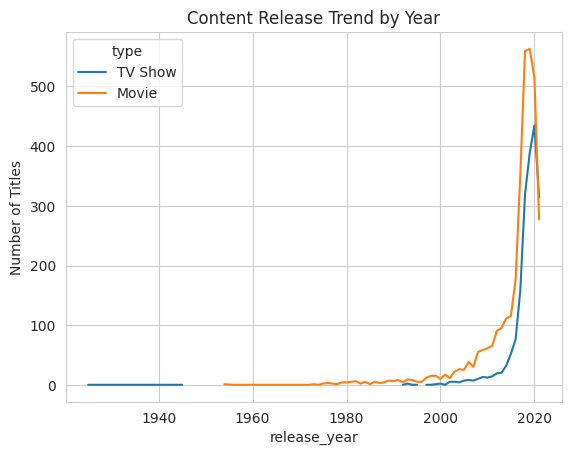

In [ ]:
release_trend.plot(kind='line', title="Content Release Trend by Year")
plt.ylabel("Number of Titles")
plt.show()

In [ ]:
# Top 10 Content-Producing Countries

top_countries = df2['country'].value_counts().head(10)
top_countries

,count
country,
United States,1545
India,602
Japan,203
United Kingdom,190
South Korea,138
Spain,110
Canada,89
France,84
Nigeria,82


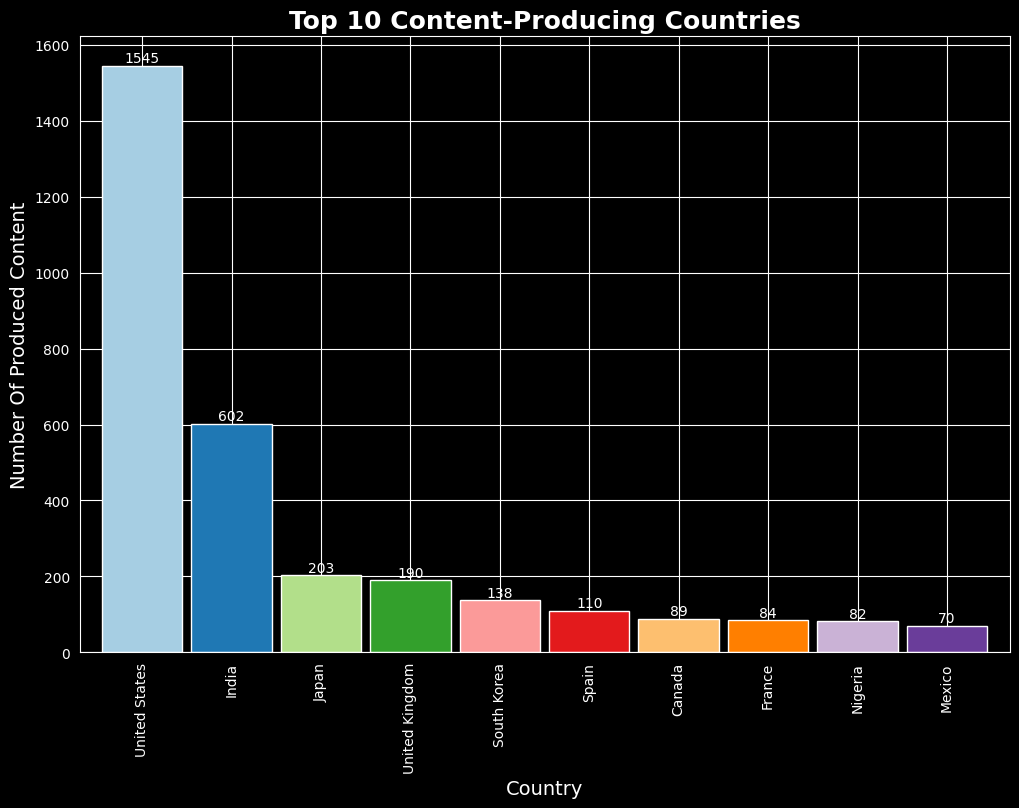

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
top_countries.plot(kind='bar', color=plt.cm.Paired.colors, width=0.9)
plt.title("Top 10 Content-Producing Countries", fontsize=18, fontweight='bold')
for i, value in enumerate(top_countries.values):
  plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number Of Produced Content', fontsize=14)
plt.show()

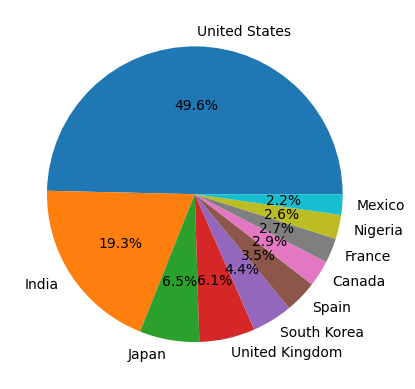

In [ ]:
sns.reset_defaults()
plt.pie(top_countries.values, autopct='%1.1f%%', labels=top_countries.index)
plt.show()

In [ ]:
# Most Common Genres Across the Dataset

genres_df = df2['genres_list'].explode()
genre_counts = genres_df.value_counts()
genre_counts_vis = genre_counts.head(10)
genre_counts_vis

,count
genres_list,
['Stand-Up Comedy'],239
"['Dramas', ' International Movies']",215
"['Comedies', ' Dramas', ' International Movies']",201
"['Dramas', ' Independent Movies', ' International Movies']",144
['Documentaries'],142
"[""Kids' TV""]",141
"['Dramas', ' International Movies', ' Romantic Movies']",131
"['Comedies', ' International Movies']",118
['Children & Family Movies'],116


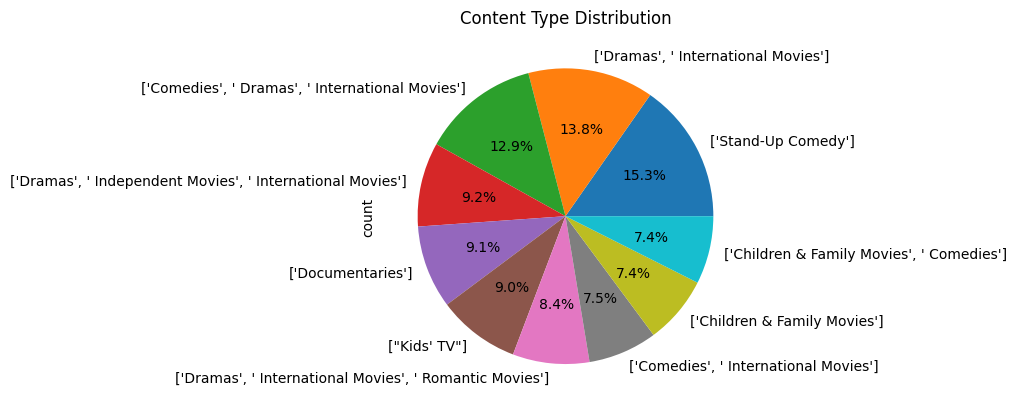

In [ ]:
genre_counts_vis.plot(kind='pie', autopct="%1.1f%%", title='Content Type Distribution')
plt.show()

In [ ]:
# Average duration of Movies & Shows

df2['movie_duration'].mean()
df2['season_count'].mean()

# Min & Max and many more Duration of Movies & Shows

print(df2['movie_duration'].describe())
print(df2['season_count'].describe())

count    3467.000000
mean      100.365734
std        29.965446
min         3.000000
25%        87.000000
50%       100.000000
75%       116.000000
max       312.000000
Name: movie_duration, dtype: float64
count    1933.000000
mean        1.788929
std         1.565658
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: season_count, dtype: float64


In [ ]:
# Just For Curiosity
df2[df2['season_count'] == 17]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,movie_duration,season_count,isMovie,isShow,genres_list,cast_list
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020.0,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",NaN,17.0,0.0,1.0,"['Romantic TV Shows', ' TV Dramas']","['Ellen Pompeo', ' Sandra Oh', ' Katherine Hei..."


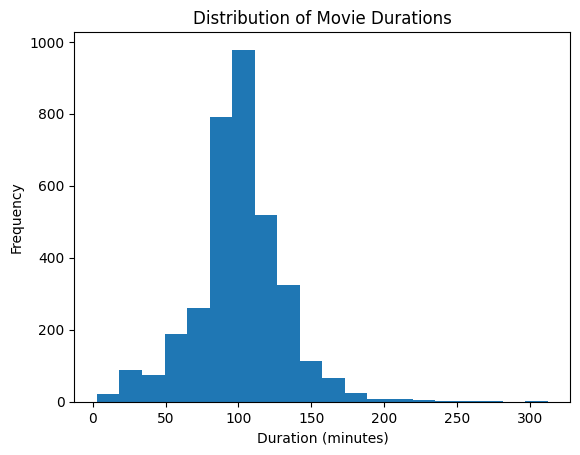

In [ ]:
df2['movie_duration'].plot(kind='hist', bins=20, title="Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.show()

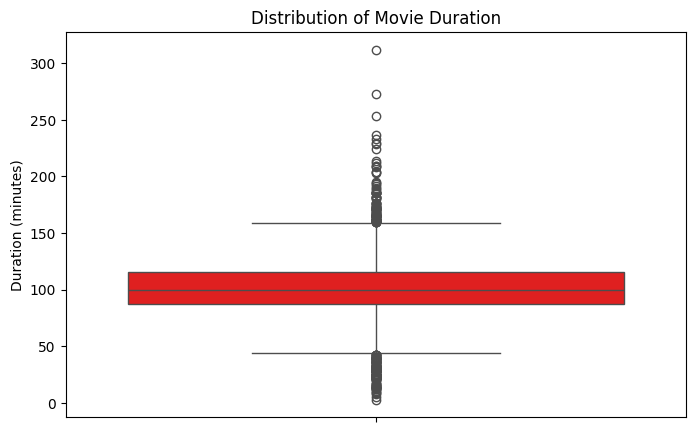

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df2['movie_duration'], color='red')
plt.title("Distribution of Movie Duration")
plt.ylabel("Duration (minutes)")
plt.show()

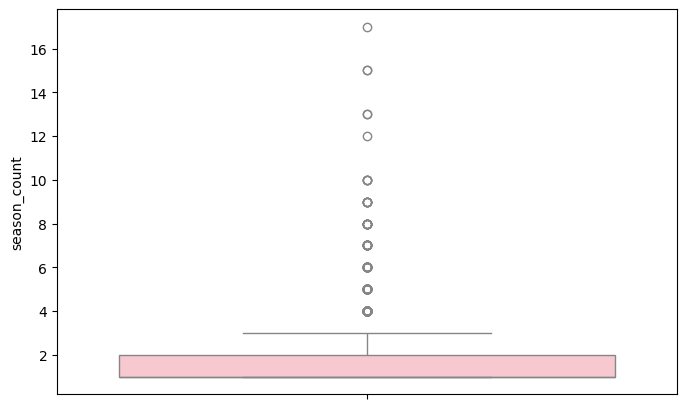

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df2['season_count'], color='pink')
plt.show()

In [ ]:
# Most frequently appearing actors and directors

top_actors = df2['cast'].explode().value_counts().head()
top_directors = df2['director'].explode().value_counts().head()
print(top_actors)
print(top_directors)

cast
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Jeff Dunham                                                                                                                7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
David Spade, London Hughes, Fortune Feimster                                                                               5
David Attenborough                                                                                                         4
Name: count, dtype: int64
director
Rajiv Chilaka             17
Suhas Kadav               15
Raúl Campos, Jan Suter    14
Marcus Raboy              13
Youssef Chahine           12
Name: count, dtype: int64


In [ ]:
# top_actors.plot(kind='bar', title='Top 5 Actors')
# plt.show()

In [ ]:
rating_distribution = df2['rating'].value_counts()
rating_distribution

,count
rating,
TV-MA,2246
TV-14,1374
TV-PG,465
R,371
TV-Y,230
PG-13,227
TV-Y7,209
TV-G,145
PG,123


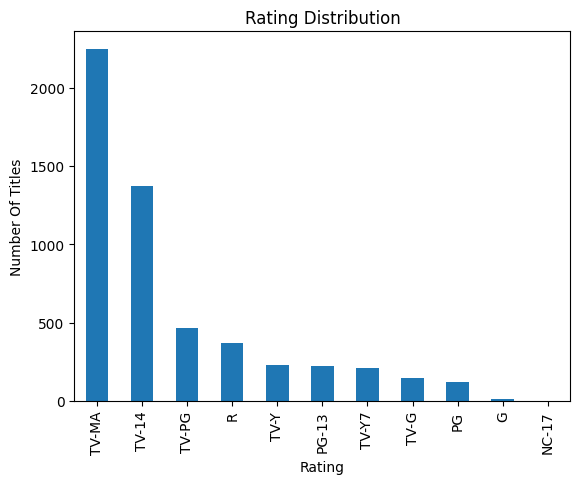

In [ ]:
# Count content by ratings

rating_distribution.plot(kind='bar', title='Rating Distribution')
plt.xlabel('Rating')
plt.ylabel("Number Of Titles")
plt.show()

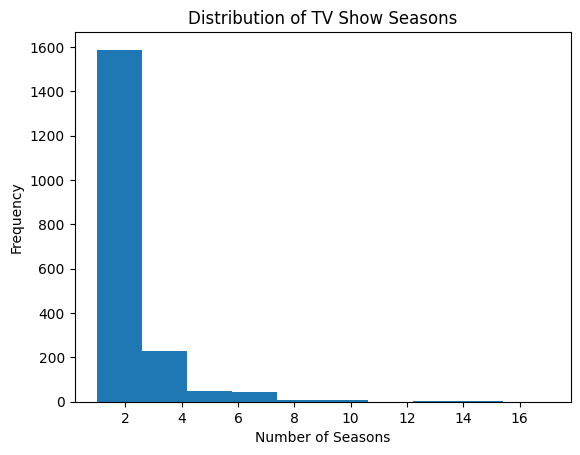

In [ ]:
# Histogram of season counts

df2['season_count'].plot(kind='hist', bins=10, title="Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.show()

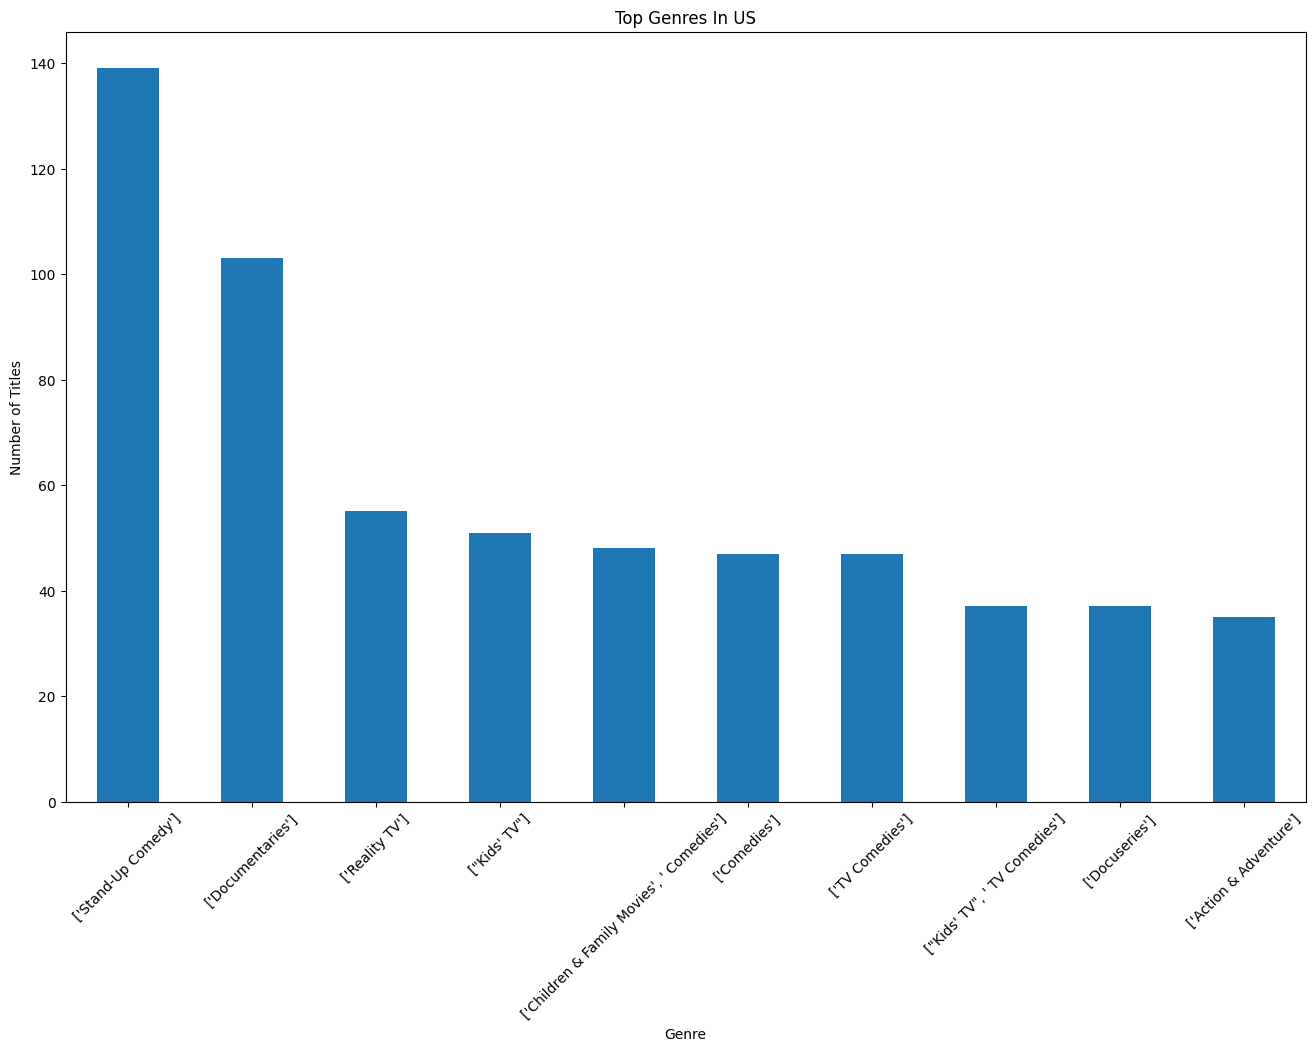

In [ ]:
# Popular Countries for Specific Genres

country_genre = df2.explode('genres_list').groupby(['country', 'genres_list']).size().unstack().fillna(0)

plt.figure(figsize=(16,10))
country_genre.loc['United States'].sort_values(ascending=False).head(10).plot(kind='bar', title='Top Genres In US')
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.show()

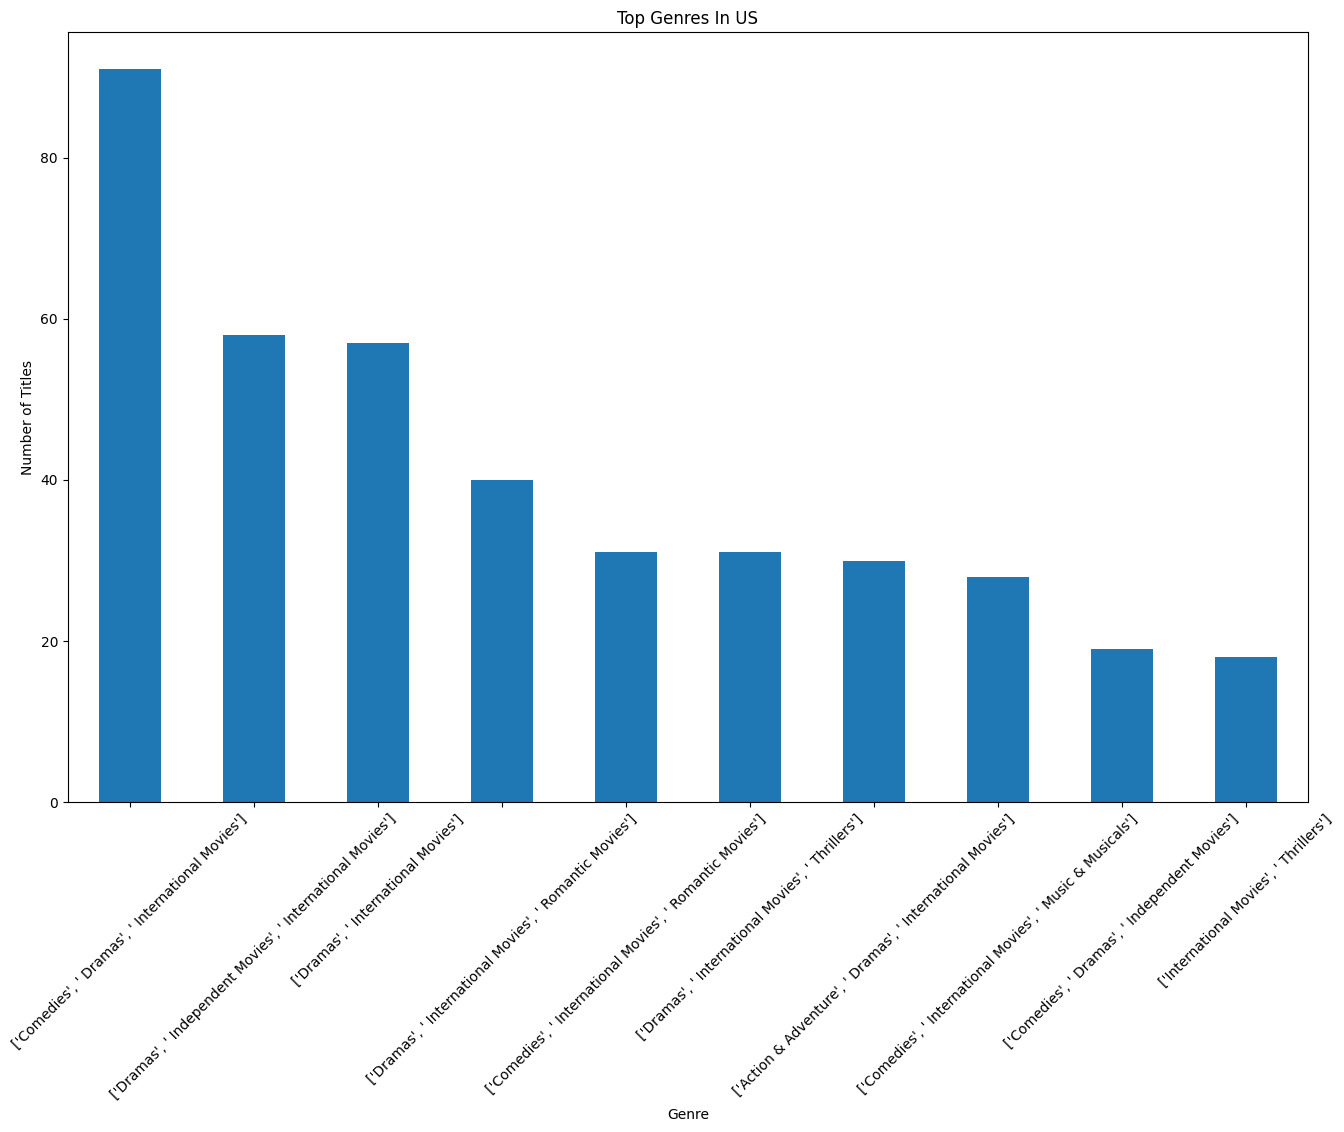

In [ ]:
# Popular Countries for Specific Genres

country_genre = df2.explode('genres_list').groupby(['country', 'genres_list']).size().unstack().fillna(0)

plt.figure(figsize=(16,10))
country_genre.loc['India'].sort_values(ascending=False).head(10).plot(kind='bar', title='Top Genres In US')
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.show()

# **Date & Year Analysis**

In [ ]:
df2['date_added'] = pd.to_datetime(df2['date_added'])

In [ ]:
# Most Movies & Shows Release Year & Date

print(df2['date_added'].value_counts().head())
df2['release_year'].value_counts().head()

date_added
2021-07-01    60
2018-10-01    60
2021-09-01    56
2021-06-02    51
2018-11-01    47
Name: count, dtype: int64


,count
release_year,
2019.0,950
2020.0,948
2018.0,877
2021.0,591
2017.0,511


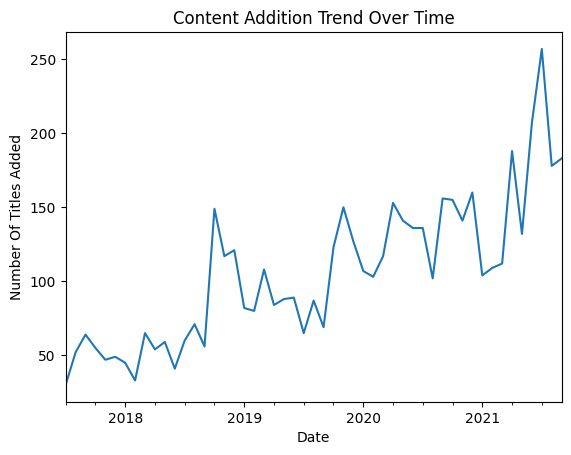

In [ ]:
#  Content Addition Trend Over Time

added_trend = df2.groupby(df2['date_added'].dt.to_period("M")).size()
added_trend.plot(kind='line', title='Content Addition Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number Of Titles Added')
plt.show()